<a href="https://colab.research.google.com/github/SUJOY-RAY/House-Price-prediction/blob/main/House_Price_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

IMPORTING THE DEPENDENCIES

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn.datasets
from sklearn.model_selection import train_test_split
from xgboost import XGBRegressor
from sklearn import metrics


In [4]:
house_price_dataframe = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/House Price Prediction/House Price India.csv', header=None)
house_price_dataframe = house_price_dataframe.apply(pd.to_numeric, errors='coerce', downcast='integer')
house_price_dataframe.dtypes

0     float64
1     float64
2     float64
3     float64
4     float64
5     float64
6     float64
7     float64
8     float64
9     float64
10    float64
11    float64
12    float64
13    float64
14    float64
15    float64
16    float64
17    float64
18    float64
19    float64
20    float64
21    float64
22    float64
dtype: object

In [5]:
house_price_dataframe.shape

(14621, 23)

In [6]:
column_names = [
    'id', 'Date', 'number of bedrooms', 'number of bathrooms', 'living area',
    'lot area', 'number of floors', 'waterfront present', 'number of views',
    'condition of the house', 'grade of the house', 'Area of the house(excluding basement)',
    'Area of the basement', 'Built Year', 'Renovation Year', 'Postal Code',
    'Latitude', 'Longitude', 'living_area_renov', 'lot_area_renov',
    'Number of schools nearby', 'Distance from the airport', 'Price'
]
house_price_dataframe.columns = column_names
house_price_dataframe['average condition grade'] = (house_price_dataframe['condition of the house'] + house_price_dataframe['grade of the house']) / 2
house_price_dataframe['total area']=(house_price_dataframe['living area']	+house_price_dataframe['lot area'])
house_price_dataframe = house_price_dataframe.drop(columns=['Longitude', 'Latitude','id','Date','Postal Code','living_area_renov', 'lot_area_renov','condition of the house', 'grade of the house','waterfront present','living area','lot area'])
house_price_dataframe.reset_index(drop=True, inplace=True)
house_price_dataframe = house_price_dataframe.drop(0)

house_price_dataframe.head()

,number of bedrooms,number of bathrooms,number of floors,number of views,Area of the house(excluding basement),Area of the basement,Built Year,Renovation Year,Number of schools nearby,Distance from the airport,Price,average condition grade,total area
1,5.0,2.50,2.0,4.0,3370.0,280.0,1921.0,0.0,2.0,58.0,2380000.0,7.5,12700.0
2,4.0,2.50,1.5,0.0,1910.0,1010.0,1909.0,0.0,2.0,51.0,1400000.0,6.5,6920.0
3,5.0,2.75,1.5,0.0,2910.0,0.0,1939.0,0.0,1.0,53.0,1200000.0,5.5,12390.0
4,4.0,2.50,2.0,0.0,3310.0,0.0,2001.0,0.0,3.0,76.0,838000.0,6.0,46308.0
5,3.0,2.00,1.5,0.0,1880.0,830.0,1929.0,0.0,1.0,51.0,805000.0,6.0,7210.0


In [7]:
house_price_dataframe.shape

(14620, 13)

In [8]:
house_price_dataframe.isnull().sum()

number of bedrooms                       0
number of bathrooms                      0
number of floors                         0
number of views                          0
Area of the house(excluding basement)    0
Area of the basement                     0
Built Year                               0
Renovation Year                          0
Number of schools nearby                 0
Distance from the airport                0
Price                                    0
average condition grade                  0
total area                               0
dtype: int64

In [9]:
house_price_dataframe.describe()

,number of bedrooms,number of bathrooms,number of floors,number of views,Area of the house(excluding basement),Area of the basement,Built Year,Renovation Year,Number of schools nearby,Distance from the airport,Price,average condition grade,total area
count,14620.000000,14620.000000,14620.000000,14620.000000,14620.000000,14620.000000,14620.000000,14620.000000,14620.000000,14620.000000,1.462000e+04,14620.000000,1.462000e+04
mean,3.379343,2.129583,1.502360,0.233105,1801.783926,296.479070,1970.926402,90.924008,2.012244,64.950958,5.389322e+05,5.556464,1.719154e+04
std,0.938719,0.769934,0.540239,0.766259,833.809963,448.551409,29.493625,416.216661,0.817284,8.936008,3.675324e+05,0.629232,3.809250e+04
min,1.000000,0.500000,1.000000,0.000000,370.000000,0.000000,1900.000000,0.000000,1.000000,50.000000,7.800000e+04,2.500000,1.423000e+03
25%,3.000000,1.750000,1.000000,0.000000,1200.000000,0.000000,1951.000000,0.000000,1.000000,57.000000,3.200000e+05,5.000000,7.040000e+03
50%,3.000000,2.250000,1.500000,0.000000,1580.000000,0.000000,1975.000000,0.000000,2.000000,65.000000,4.500000e+05,5.500000,9.594500e+03
75%,4.000000,2.500000,2.000000,0.000000,2240.000000,580.000000,1997.000000,0.000000,3.000000,73.000000,6.450000e+05,6.000000,1.309325e+04
max,33.000000,8.000000,3.500000,4.000000,9410.000000,4820.000000,2015.000000,2015.000000,3.000000,80.000000,7.700000e+06,8.500000,1.077228e+06


In [10]:
correlation=house_price_dataframe.corr()
print(correlation)

                                       number of bedrooms  \
number of bedrooms                               1.000000   
number of bathrooms                              0.509784   
number of floors                                 0.177294   
number of views                                  0.078665   
Area of the house(excluding basement)            0.473599   
Area of the basement                             0.300332   
Built Year                                       0.152954   
Renovation Year                                  0.016132   
Number of schools nearby                         0.003397   
Distance from the airport                       -0.006157   
Price                                            0.308460   
average condition grade                          0.343583   
total area                                       0.048163   

                                       number of bathrooms  number of floors  \
number of bedrooms                                0.509784       

<Axes: >

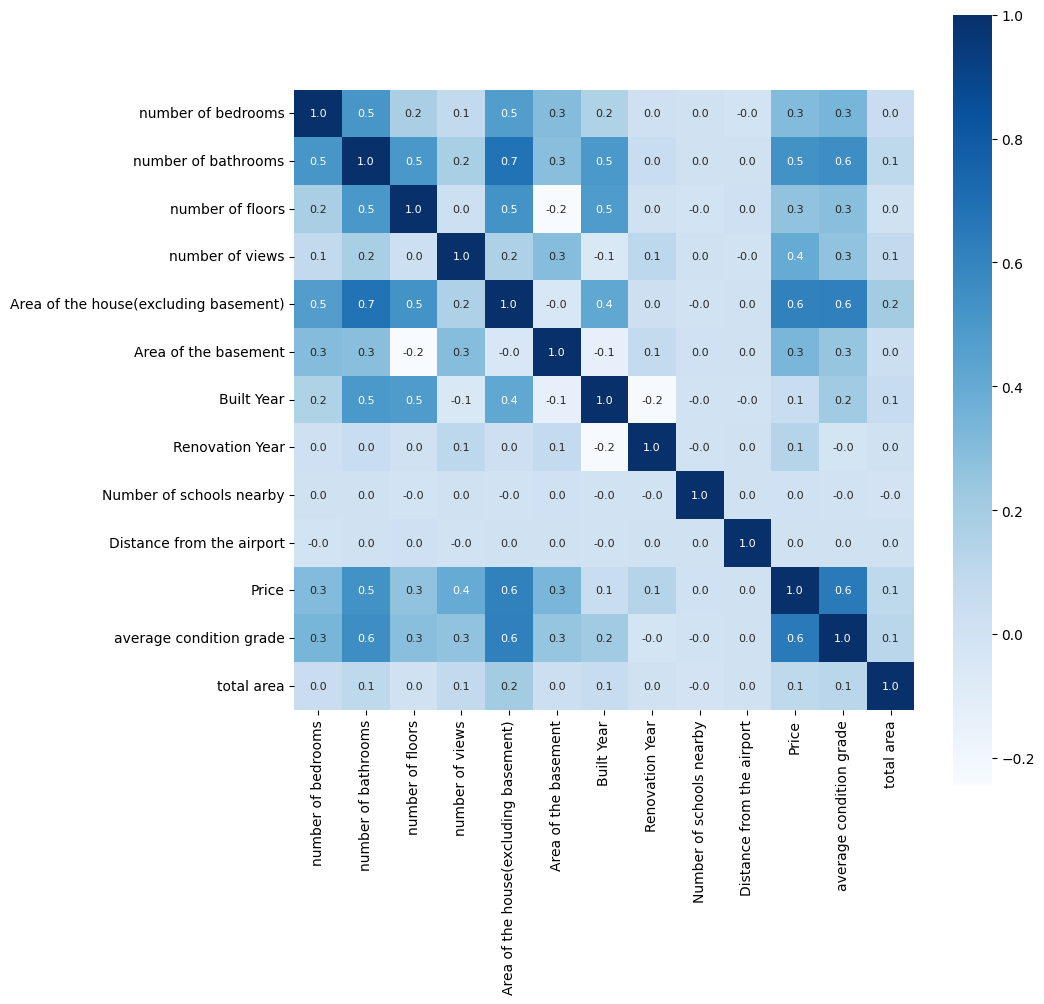

In [11]:
plt.figure(figsize=(10,10))
sns.heatmap(correlation,cbar=True,square=True,fmt='.1f',annot=True,annot_kws={'size':8},cmap="Blues")

In [12]:
#splitting the data and target
X=house_price_dataframe.drop(['Price'],axis=1)
Y=house_price_dataframe['Price']


In [13]:
print(X)
print(Y)

       number of bedrooms  number of bathrooms  number of floors  \
1                     5.0                 2.50               2.0   
2                     4.0                 2.50               1.5   
3                     5.0                 2.75               1.5   
4                     4.0                 2.50               2.0   
5                     3.0                 2.00               1.5   
...                   ...                  ...               ...   
14616                 2.0                 1.50               1.0   
14617                 3.0                 2.00               1.5   
14618                 2.0                 1.00               1.0   
14619                 4.0                 1.00               1.0   
14620                 3.0                 1.00               1.0   

       number of views  Area of the house(excluding basement)  \
1                  4.0                                 3370.0   
2                  0.0                               

In [27]:
X.head()

,number of bedrooms,number of bathrooms,number of floors,number of views,Area of the house(excluding basement),Area of the basement,Built Year,Renovation Year,Number of schools nearby,Distance from the airport,average condition grade,total area
1,5.0,2.50,2.0,4.0,3370.0,280.0,1921.0,0.0,2.0,58.0,7.5,12700.0
2,4.0,2.50,1.5,0.0,1910.0,1010.0,1909.0,0.0,2.0,51.0,6.5,6920.0
3,5.0,2.75,1.5,0.0,2910.0,0.0,1939.0,0.0,1.0,53.0,5.5,12390.0
4,4.0,2.50,2.0,0.0,3310.0,0.0,2001.0,0.0,3.0,76.0,6.0,46308.0
5,3.0,2.00,1.5,0.0,1880.0,830.0,1929.0,0.0,1.0,51.0,6.0,7210.0


In [14]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2,random_state=2)

In [15]:
print(X.shape,X_train.shape,X_test.shape)

(14620, 12) (11696, 12) (2924, 12)


XGBoost Regressor

In [16]:
model=XGBRegressor()

In [17]:
#training the model using X_train
model.fit(X_train,Y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

EVALUATION

Predict on training data

In [18]:
#accuracy for prediction on training data
training_data_prediction=model.predict(X_train)

In [19]:
print(training_data_prediction)

[357053.56 312791.62 512761.9  ... 328383.   428103.94 716882.94]


In [20]:
#R squared error
score_1=metrics.r2_score(Y_train,training_data_prediction)

In [21]:
print("R squared error: ",score_1)


R squared error:  0.9259739485546161


Visualizing the actual prices and predicted prices

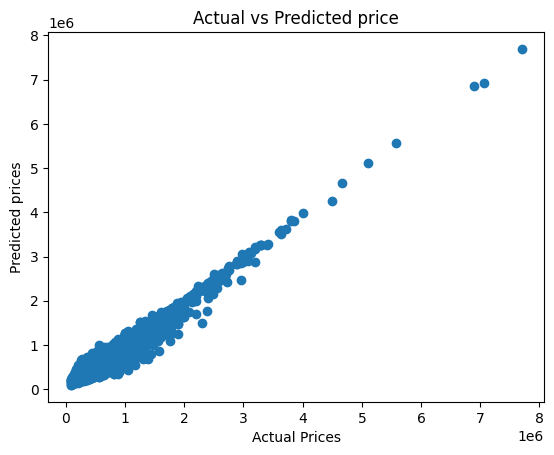

In [22]:
plt.scatter(Y_train,training_data_prediction)
plt.xlabel("Actual Prices")
plt.ylabel("Predicted prices")
plt.title("Actual vs Predicted price")
plt.show()

Prediction on test data

In [23]:
test_data_prediction=model.predict(X_test)

In [24]:
#R squared error
score_2=metrics.r2_score(Y_test,test_data_prediction)

In [25]:
print("R squared error: ",score_2)

R squared error:  0.6564449578160478


In [32]:
input_data = np.array([4.0	,2.50	,1.5	,0.0	,1910.0	,1010.0	,1909.0	,0.0	,2.0	,51.0	,6.5	,6920.0]).reshape(1, -1)

prediction = model.predict(input_data)
print("Predicted price of the house:", prediction[0])


Predicted price of the house: 1174048.6


In [30]:
Y.head()

1    2380000.0
2    1400000.0
3    1200000.0
4     838000.0
5     805000.0
Name: Price, dtype: float64

In [31]:
X.head()

,number of bedrooms,number of bathrooms,number of floors,number of views,Area of the house(excluding basement),Area of the basement,Built Year,Renovation Year,Number of schools nearby,Distance from the airport,average condition grade,total area
1,5.0,2.50,2.0,4.0,3370.0,280.0,1921.0,0.0,2.0,58.0,7.5,12700.0
2,4.0,2.50,1.5,0.0,1910.0,1010.0,1909.0,0.0,2.0,51.0,6.5,6920.0
3,5.0,2.75,1.5,0.0,2910.0,0.0,1939.0,0.0,1.0,53.0,5.5,12390.0
4,4.0,2.50,2.0,0.0,3310.0,0.0,2001.0,0.0,3.0,76.0,6.0,46308.0
5,3.0,2.00,1.5,0.0,1880.0,830.0,1929.0,0.0,1.0,51.0,6.0,7210.0
